Enter the Grid Size: The Number of Squares Along One Side of a Square Grid, 5 or 10, say ---  5


The Size of the Hypothetical Spatial System is 5 Zones by 5 Zones, Making 25 in All



Mean Trip Length of the Hypothetical Data  1.8421047015914735



Enter the Parameter Value on Distance - beta - that You Think Best Fits the Data: It should be greater than 0 and less than 1 ----  0.7




Mean Trip Length of the Model  1.680976386709437

Zone 	 ObsO 	 ObsD 	 PredO 	 PredD

1 	 34.69 	 22.36 	 23.66 	 15.51
2 	 34.39 	 38.23 	 30.75 	 33.71
3 	 35.16 	 41.09 	 33.97 	 38.78
4 	 44.78 	 39.31 	 39.79 	 34.17
5 	 31.40 	 31.17 	 21.55 	 20.93
6 	 33.04 	 36.12 	 29.10 	 32.06
7 	 47.25 	 58.68 	 54.66 	 67.24
8 	 57.12 	 56.12 	 70.73 	 68.65
9 	 32.54 	 45.67 	 36.74 	 50.63
10 	 27.97 	 32.34 	 24.32 	 27.43
11 	 41.93 	 35.27 	 39.42 	 33.75
12 	 56.20 	 53.89 	 68.80 	 66.56
13 	 49.71 	 42.68 	 64.93 	 56.50
14 	 41.96 	 36.24 	 50.24 	 43.80
15 	 39.39 	 45.58 	 36.72 	 42.42
16 	 41.40 	 34.50 	 35.87 	 30.34
17 	 32.42 	 37.86 	 36.37 	 42.87
18 	 56.10 	 48.49 	 67.70 	 59.74
19 	 50.00 	 41.45 	 55.82 	 47.43
20 	 43.64 	 34.02 	 37.88 	 30.13
21 	 26.45 	 30.24 	 18.05 	 20.52
22 	 36.23 	 43.27 	 31.84 	 37.76
23 	 40.92 	 38.64 	 38.80 	 36.84
24 	 37.49 	 45.94 	 33.14 	 40.87
25 	 27.83 	 30.84 	 19.14 	 21.37


Correlation and its p-Test (0.9463462980624612, 9.010111738368429e-13)


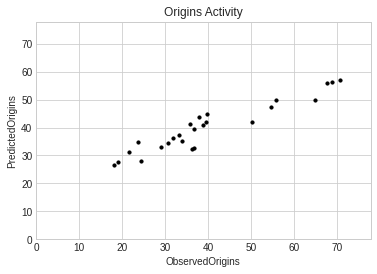

Correlation and its p-Test (0.9348721930594136, 7.905834041303546e-12)


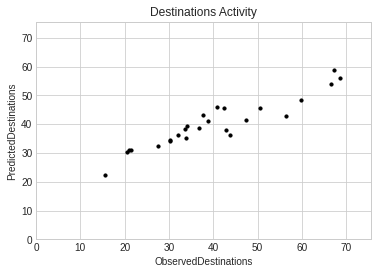

Correlation and its p-Test (0.6618862637107212, 5.049203442161058e-80)


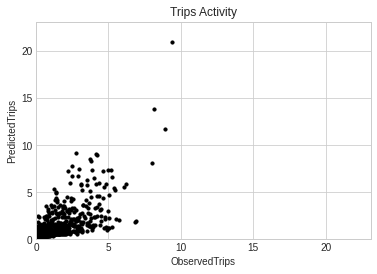

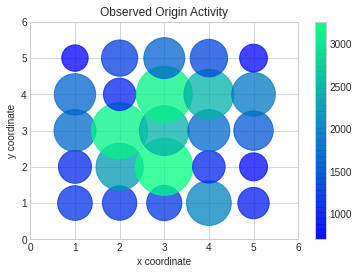

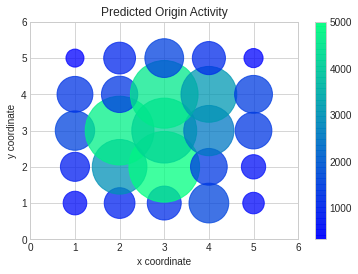

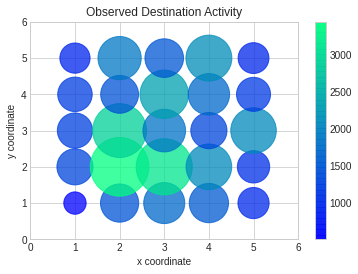

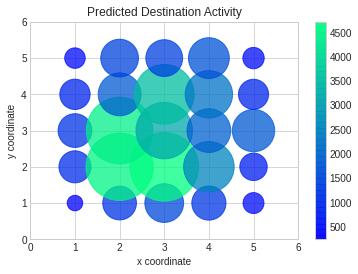

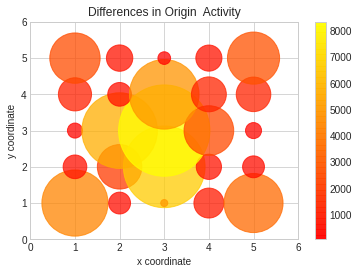

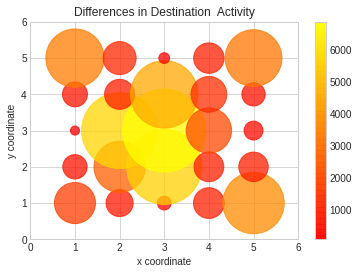

The model and its outputs are now complete



In [1]:
%matplotlib inline
import numpy as np
import math
from matplotlib import pyplot as plt
from numpy import random
import numpy as np
from scipy import stats
plt.style.use('seaborn-whitegrid')

#Defined Functions: for Plotting observed and Predicted Model Results on the Grid, 
#the Friction of Distance Parameter, and the Location-Interactions Plots for Correlations

def friction(parameter,dis):
    frict=math.exp(parameter*dis)
    return frict

def locintplot(obs,pred,activities, M):
    maxo=np.max(obs); maxop=np.max(pred)
    if maxo>maxop:
        maxv=maxo
    else:
        maxv=maxop
    maxv=maxv*(1.1)
    plt.axis([0,maxv,0,maxv])
    plt.xlabel("Observed" + activities)
    plt.ylabel("Predicted" + activities)
    plt.title(activities + " Activity")
    plt.scatter(pred, obs, s=10,c='black')
    flatobs = np.reshape(obs, M)
    flatpred = np.reshape(pred, M)
    print("Correlation and its p-Test",stats.pearsonr(flatobs, flatpred))
    return

def scattergraph(soutput,dataname,colours):
    plt.show()
    sizes=soutput**2
    plt.axis([0,n,0,n])
    plt.xlabel("x coordinate")
    plt.ylabel("y coordinate")
    plt.title(dataname + ' Activity')
    plt.scatter(xcoord, ycoord, c=sizes, s=sizes, alpha=0.75, cmap=colours)
    return

#Defining the Hypothetical Spatial System

xcoord=np.array([])
ycoord=np.array([])

n=input("Enter the Grid Size: The Number of Squares Along One Side of a Square Grid, 5 or 10, say --- ")
n=int(n); N=n*n
print("The Size of the Hypothetical Spatial System is",n, "Zones by", n,"Zones, Making", N,"in All")
print()

distance=np.full((N,N), 1.0)

n=n+1
for y in range(1,n):
    for x in range(1,n):
        xcoord = np.append(xcoord,[x]) 
        ycoord = np.append(ycoord,[y])
        
#for i in range(0,N):
#        print(i, xcoord[i], ycoord[i])
        
input()
ij=0
for i in range (0,N):
    xi=xcoord[i]
    yi=ycoord[i]
    for j in range (0,N):
        ij=ij+1
        xj=xcoord[j]
        yj=ycoord[j]
        dis=math.sqrt((((xi-xj)**2)+((yi-yj)**2)))
        distance[i][j]=dis
        if distance[i][j]==0:
            distance[i][j]=0.5
        #print(i+1,j+1,distance[i][j])

#Defining the Hypothetical Trip, Origin and Destination Data

tobs=np.full((N,N), 1.0)
origins=np.full((N),1.0)
destinations=np.full((N),1.0)
differences=np.full((N),1.0)

for i in range (0,N):
    for j in range (0,N):
        tobs[i][j]=1.0/(distance[i][j]*(0.1+random.rand()))
Tobs = np.sum(tobs)
CMean=0.0
for i in range (0,N):
    for j in range(0,N):
        ij=ij+1
        tobs[i][j]=1000*(tobs[i][j]/Tobs)
        CMean=CMean+tobs[i,j]*distance[i][j]

origins = np.sum(tobs, axis = 1)
destinations = np.sum(tobs, axis = 0)

To=np.sum(origins) 
Td=np.sum(destinations)
Tobs = np.sum(tobs)
CMean=CMean/Tobs


print("Mean Trip Length of the Hypothetical Data ", CMean)
print()
#Defining and Running th Unconstrained Gravity Model

beta=input("Enter the Parameter Value on Distance - beta - that You Think Best Fits the Data: It should be greater than 0 and less than 1 ---- ")
beta=float(beta)
print()
trips=np.full((N,N),1.0)
OPred=np.full((N),1.0)
DPred=np.full((N), 1.0)
trips1=np.full((N,N),1.0)
tobs1=np.full((N,N),1.0)

total=1000
for i in range(0,N):
    for j in range(0,N):
        trips[i][j]=origins[i]*destinations[j]/(friction(beta, distance[i][j]))
Ttrip=np.sum(trips)
CCMean=0.0
for i in range(0,N):
    for j in range(0,N):
        trips[i][j]=total*((origins[i]*destinations[j])/(friction(beta, distance[i][j])))/Ttrip 
        CCMean=CCMean+trips[i][j]*distance[i][j]
#Printing the Predictions

Ttrip=np.sum(trips)
CCMean=CCMean/Ttrip
print()
print("Mean Trip Length of the Model ", CCMean)
print()
OPred = np.sum(trips, axis = 1)
DPred = np.sum(trips, axis = 0)

print("Zone","\t","ObsO","\t","ObsD","\t","PredO","\t","PredD")
print()
for i in range(0,N):
    print(i+1, "\t","{:.2f}".format(origins[i]), "\t","{:.2f}".format(destinations[i]),"\t","{:.2f}".format(OPred[i]),"\t","{:.2f}".format(DPred[i]))

#Comparing Observed with Predicted Origin Activity Using Scattergraphs

input()
locintplot(origins, OPred, 'Origins',N)
plt.savefig('OriginOutputs.png', dpi=300, bbox_inches='tight')
plt.show()

input()
locintplot(destinations, DPred, 'Destinations',N)
plt.savefig('DestOutputs.png', dpi=300, bbox_inches='tight')
plt.show()

input()
M=N*N
locintplot(tobs, trips, 'Trips',M)
plt.savefig('TripOutputs.png', dpi=300, bbox_inches='tight')
plt.show()

rng = np.random.RandomState(0)
colors = rng.rand(N)

#Plotting Observed and Predicted Locations on the Hypothetical Grid

input()
scattergraph(origins, 'Observed Origin','winter')
plt.savefig('ObsOrigins.png', dpi=300, bbox_inches='tight')
plt.colorbar()
plt.show()

input()
scattergraph(OPred, 'Predicted Origin','winter')
plt.savefig('PredOrigins.png', dpi=300, bbox_inches='tight')
plt.colorbar()
plt.show()

input()
scattergraph(destinations, 'Observed Destination','winter')
plt.savefig('ObsDestinations.png', dpi=300, bbox_inches='tight')
plt.colorbar()
plt.show()

input()
scattergraph(DPred, 'Predicted Destination','winter')
plt.savefig('PredDestinations.png', dpi=300, bbox_inches='tight')
plt.colorbar()
plt.show()

#Measuring the Differences Between Predictions and Observations

for i in range(0,N):
    differences[i]=(origins[i]-OPred[i])*6
input()

scattergraph(differences, 'Differences in Origin ','autumn')
plt.savefig('Odifferences.png', dpi=300, bbox_inches='tight')
plt.colorbar()
plt.show()

for i in range(0,N):
    differences[i]=(destinations[i]-DPred[i])*6
input()
scattergraph(differences, 'Differences in Destination ','autumn')
plt.savefig('Ddifferences.png', dpi=300, bbox_inches='tight')
plt.colorbar()
plt.show()

print("The model and its outputs are now complete")
print()





